<a href="https://colab.research.google.com/github/Mercykiminza/AI/blob/main/KNN_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
!pip install numpy matplotlib scikit-learn



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (species)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return the indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        return np.bincount(k_nearest_labels).argmax()


In [ ]:
# Initialize the KNN classifier with k=3
knn = KNNClassifier(k=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


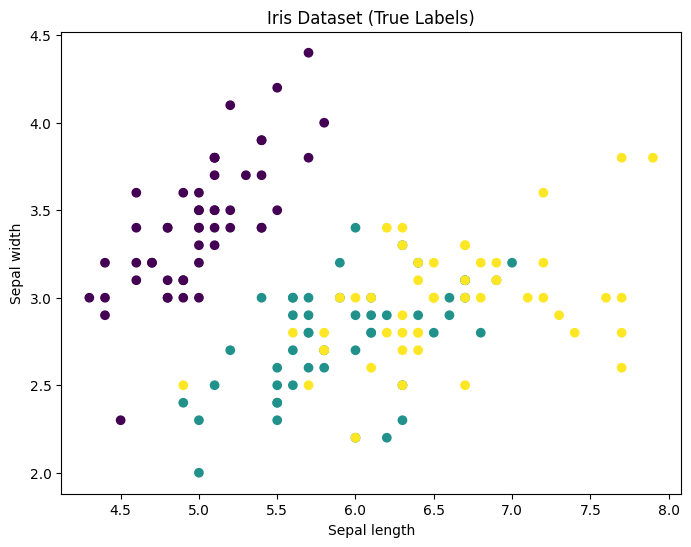

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the first two features
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset (True Labels)')
plt.show()


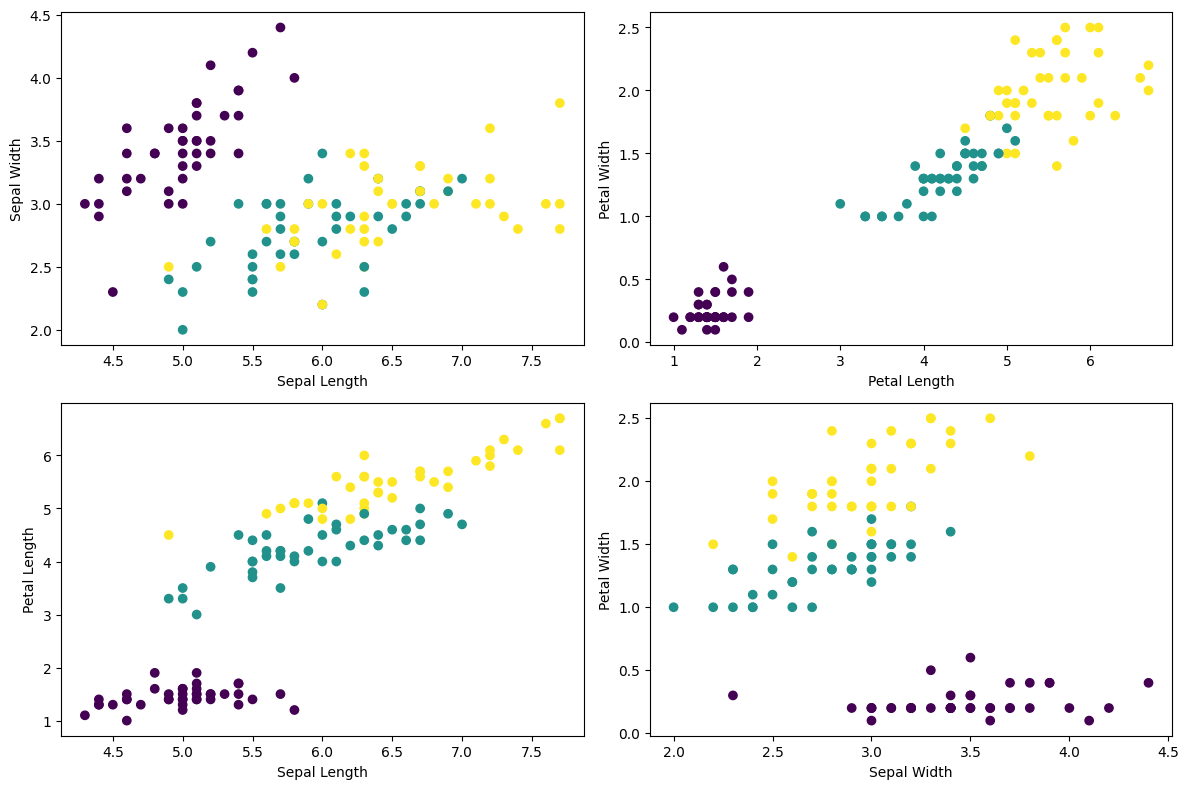

In [ ]:
# Scatter plot of all four features against the true labels
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(2, 2, 2)
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 2, 3)
plt.scatter(X_train[:, 0], X_train[:, 2], c=y_train, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.subplot(2, 2, 4)
plt.scatter(X_train[:, 1], X_train[:, 3], c=y_train, cmap='viridis')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

